In [1]:
import numpy as np
from random import random
from math import *

'____________________________________________________________________'
class neuron :
    def __init__(self,n):
        self.membpot=100.0   
        self.input_weights=[0]*n
        self.output_weights=[0]*n #the weights the neuron gives to the neurons of next layer
        self.activity=0
            

    def initial_update(self):
        for i in range(len(self.input_weights)):
            self.input_weights[i]=random()
            
        for j in range(len(self.output_weights)):
            self.output_weights[j]=random()
        sum1=0
        for i in range(len(self.input_weights)):
            sum1+=self.input_weights[i]
        self.activity=1/(1+exp(-sum1)) #it's the sigmoid
        return(self.input_weights,self.output_weights)
            
    def update(self):
        sum1=0     
        for i in range(len(self.input_weights)):
            sum1+=self.input_weights[i] #this time the inputs are given by the previous layer
        self.activity=1/(1+exp(-sum1)) #it's the sigmoid
        
        #update output
        for i in range(len(self.output_weights)):
            self.output_weights[i]=random()*self.activity
            
        return(self.output_weights)
    

'_______________________________________________________________'
class layer :
    def __init__(self,n_neurons):
        self.matrix=np.zeros((n_neurons,n_neurons)) #matrix of weights the layer inputs to the next one
        self.input_matrix=np.zeros((n_neurons,n_neurons))
        self.n_neurons=n_neurons
        
    def initial_update(self):
        for i in range(self.n_neurons):
            N=neuron(self.n_neurons)
            N.initial_update()
            print('input weights of neuron',i,'here',N.input_weights)
            self.matrix[:,i]=N.output_weights
            self.matrix[i,i]=0
            
    def update(self):
        for i in range(self.n_neurons):
            N=neuron(self.n_neurons)
            N.input_weights=self.input_matrix[i,:]
            print('input weights of neuron',i,'here',N.input_weights)
            N.update()
            self.matrix[:,i]=N.output_weights
            self.matrix[i,i]=0

'_______________________________________________________________'
class network :
    def __init__(self,n_layers,n_neurons):
        self.n_layers=n_layers
        self.n_neurons=n_neurons
    
    def update(self):
        for k in range(self.n_layers):
            L=layer(self.n_neurons)
            if k==0 : #first layer
                L.initial_update()
            else:
                L.input_matrix=L_save.matrix #the input matrix is the output matrix of the previous one
                L.update()
            L_save=L
            print('its layer',k,'matrix','of outputs. i.e. inputs for next layer')
            print(L_save.matrix)
   


We make a matrix of weights to represent layers of neurons, and their weights. Each neuron is connected with all the others. One column of the matrix represents one layer of neurons :
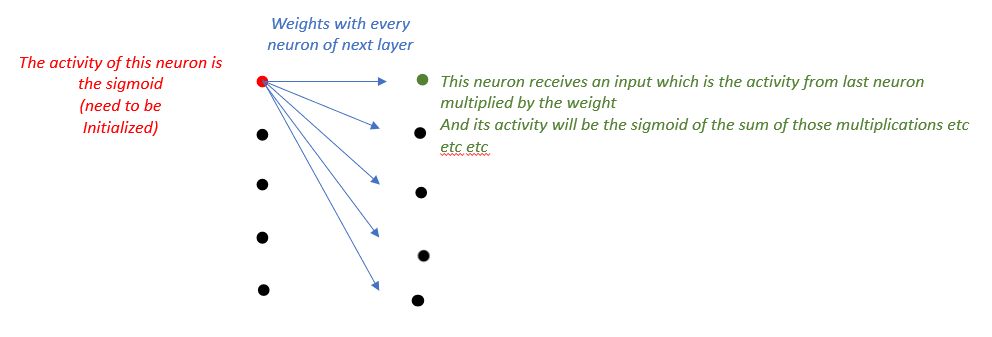

In [2]:
def main():
    n_neurons=5
    n_layers=3
    my_network=network(n_layers,n_neurons)
    my_network.update()
    
main()


input weights of neuron 0 here [0.12655240234831222, 0.2114920188039695, 0.5931058438049996, 0.6232632796980626, 0.7884121219307244]
input weights of neuron 1 here [0.16999232308639778, 0.5947151031718357, 0.8821497518049355, 0.10620522948972833, 0.28690002582034524]
input weights of neuron 2 here [0.5983196743368465, 0.42992374919320653, 0.8202807628750463, 0.49344156445848575, 0.3404696570527219]
input weights of neuron 3 here [0.6550774764500298, 0.7406636287621755, 0.6117278489132447, 0.1533343140018989, 0.7357715195365642]
input weights of neuron 4 here [0.946889429308055, 0.8253911289341671, 0.1397090789571831, 0.9236755785507068, 0.9679983179263982]
its layer 0 matrix of outputs. i.e. inputs for next layer
[[0.         0.22722125 0.26651732 0.02832373 0.09690938]
 [0.28361618 0.         0.42221097 0.78926994 0.54900426]
 [0.32261765 0.69781601 0.         0.74948428 0.73464604]
 [0.22802831 0.27759069 0.62159073 0.         0.65521759]
 [0.25192697 0.52329844 0.06157512 0.41587816

To do : **Winner take all**